## Reading movie metadata

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

metadata = pd.read_table("MovieSummaries/MovieSummaries/movie.metadata.tsv", header=None)

metadata.columns = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countxries",  
    "Movie_genres"     
]

metadata

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countxries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Checking types and Nans

In [100]:
metadata.isna().sum()

Wikipedia_movie_ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date           6902
Movie_box_office_revenue    73340
Movie_runtime               20450
Movie_languages                 0
Movie_countxries                0
Movie_genres                    0
dtype: int64

In [101]:
metadata.dtypes

Wikipedia_movie_ID            int64
Freebase_movie_ID            object
Movie_name                   object
Movie_release_date           object
Movie_box_office_revenue    float64
Movie_runtime               float64
Movie_languages              object
Movie_countxries             object
Movie_genres                 object
dtype: object

## Loading summaries

In [102]:
with open("MovieSummaries/MovieSummaries/plot_summaries.txt", "r", encoding="utf-8") as f:
    file = f.readlines()

data = [line.strip().split("\t", 1) for line in file]

summaries_df = pd.DataFrame(data, columns=["Wikipedia_movie_ID", "Movie_Summary"])

summaries_df['Wikipedia_movie_ID'] = summaries_df['Wikipedia_movie_ID'].astype("int")

In [103]:
summaries_df.isna().sum()

Wikipedia_movie_ID    0
Movie_Summary         0
dtype: int64

## Merging datasets

In [104]:
final_df = metadata.merge(summaries_df, on="Wikipedia_movie_ID") 

In [105]:
final_df.isna().sum()

Wikipedia_movie_ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date           2618
Movie_box_office_revenue    34619
Movie_runtime                6624
Movie_languages                 0
Movie_countxries                0
Movie_genres                    0
Movie_Summary                   0
dtype: int64

In [106]:
final_df["Movie_box_office_revenue"]

0        14010832.0
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
42202           NaN
42203           NaN
42204           NaN
42205           NaN
42206           NaN
Name: Movie_box_office_revenue, Length: 42207, dtype: float64

In [107]:
pd.DataFrame(np.unique(final_df.Movie_genres))               

,0
0,"{""/m/014dsx"": ""Travel"", ""/m/01z4y"": ""Comedy""}"
1,"{""/m/014dsx"": ""Travel"", ""/m/0219x_"": ""Indie"", ..."
2,"{""/m/014dsx"": ""Travel"", ""/m/0hj3n89"": ""Instrum..."
3,"{""/m/014dsx"": ""Travel"", ""/m/0jtdp"": ""Documenta..."
4,"{""/m/01585b"": ""Slasher""}"
...,...
17848,"{""/m/0vjs6"": ""Detective"", ""/m/03btsm8"": ""Actio..."
17849,"{""/m/0vjs6"": ""Detective"", ""/m/03k9fj"": ""Advent..."
17850,"{""/m/0vjs6"": ""Detective"", ""/m/04pbhw"": ""Superh..."
17851,"{""/m/0vjs6"": ""Detective"", ""/m/082gq"": ""War film""}"


## Processing movie genres

In [108]:
import json
final_df["Movie_genres"] = final_df["Movie_genres"].apply(lambda x: list(json.loads(x).values()))
# final_df.head

In [109]:
final_df[final_df['Wikipedia_movie_ID'] == 29666067]

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countxries,Movie_genres,Movie_Summary
32436,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","[Crime Fiction, Mystery, Drama, Thriller]",Veteran homicide cop Ferman and his hot-heade...


## Processing dates to only keep year

In [110]:
#Removing Nan entries
final_df = final_df.dropna(subset=['Movie_release_date'])

# Processing date to only keep year
final_df['Movie_release_date'] = final_df['Movie_release_date'].str[:4].astype(int)
# could use pd.to_datetime
# Fixing typo
final_df.loc[final_df['Movie_release_date']==1010,'Movie_release_date'] = 2010

dates = final_df['Movie_release_date'].unique()
dates.sort()
dates

array([1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014])

## Filtering for erotic movies:

In [111]:
erotic_genres = ['Sex comedy','Erotica','Erotic thriller','Pornographic movie','Adult','Erotic Drama','Sexploitation','Softcore Porn','Gay pornography','Hardcore pornography','Pornography']
erotic_df = final_df[final_df["Movie_genres"].apply(lambda x: any(genre in erotic_genres for genre in x))]
erotic_df

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countxries,Movie_genres,Movie_Summary
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
32,1254263,/m/04mhwd,Shivers,1975,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","[Science Fiction, Horror, Erotica, Sci-Fi Horr...",Dr. Emil Hobbes is conducting unorthodox expe...
41,5664529,/m/0dyy_v,Vixen!,1968,NaN,70.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Softcore Porn, Sexploitation]","In the heart of the Canadian wilderness, sultr..."
50,24196090,/m/07k8x7p,The World of Geisha,1973,NaN,73.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","[Erotic Drama, Japanese Movies, Erotica, World...","In 1918, against the background of political e..."
129,16055450,/m/03qmssn,If They Tell You I Fell,1989,NaN,110.0,"{""/m/06nm1"": ""Spanish Language""}","{""/m/06mkj"": ""Spain""}","[Thriller, Erotic Drama, Drama, World cinema]","In the post Spanish Civil War years, Catalan k..."
...,...,...,...,...,...,...,...,...,...,...
41902,7092616,/m/0h3sc6,Traci Takes Tokyo,1986,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","[Japanese Movies, Pornographic movie]",Traci Lords arrives at Tokyo to explore Japane...
41998,1661980,/m/05lktw,"After Dark, My Sweet",1990,2678414.0,114.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Crime Fiction, Erotic thriller, Cri...","Ex-boxer Kevin ""Kid"" Collins is a drifter and ..."
42035,22056282,/m/05p900w,Whispers in the Dark,1992,11124511.0,102.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Mystery, Crime Thriller, Psychologi...",The confessions of a sadomasochistic sexually ...
42163,9271903,/m/0282j29,Trois,2000,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Erotic thriller, Romance Film, Psyc...",Jermaine Davis is a young corporate tycoon wh...


## Plotting movies over time

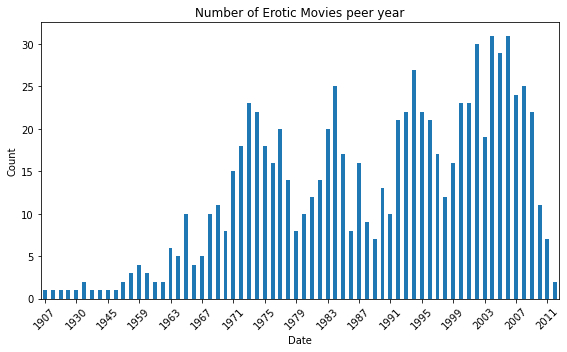

In [121]:
erotic_date_counts = erotic_df['Movie_release_date'].value_counts()
erotic_date_counts = erotic_date_counts.sort_index()
# Plotting the erotic date counts
plt.figure(figsize=(8, 5))
plt.title('Number of Erotic Movies peer year')
erotic_date_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap

plt.xticks(ticks=range(0, len(erotic_date_counts), 4), labels=erotic_date_counts.index[::4], rotation=45)

plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

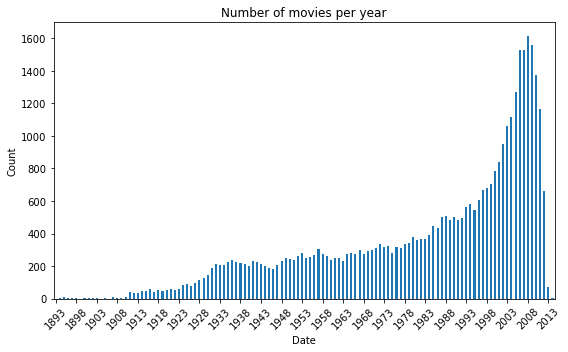

In [119]:
full_date_counts = final_df['Movie_release_date'].value_counts()
full_date_counts = full_date_counts.sort_index()
# Plotting the full date counts
plt.figure(figsize=(8, 5))
plt.title('Number of movies per year')
full_date_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap

# Show only every second label
plt.xticks(ticks=range(0, len(full_date_counts), 5), labels=full_date_counts.index[::5], rotation=45)

plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

## Graphing proportion of movies which are erotic

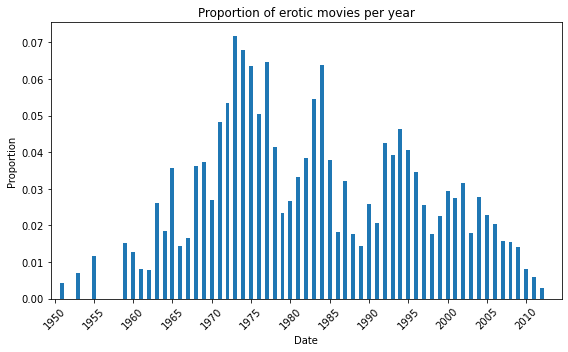

In [126]:
erotic_prop = (erotic_date_counts/full_date_counts).fillna(0)

# Starting in the 50s since we don't have enough movies before that
erotic_prop = erotic_prop[erotic_prop.index >= 1950]

# Plotting the proportions
plt.figure(figsize=(8, 5))
plt.title('Proportion of erotic movies per year')
erotic_prop.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Proportion')
# plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap

# Show only every second label
plt.xticks(ticks=range(0, len(erotic_prop), 5), labels=erotic_prop.index[::5], rotation=45)

plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()